In [59]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\sarah\OneDrive\Documents\MS DATA SCIENCE\Capstone Project\Repo\geo-health-ai\Working_Files


In [61]:
# Load PLACES Data
df_places = pd.read_csv('../data/PLACES.csv')

# Head of PLACES
print(df_places.head())

  StateAbbr StateDesc CountyName  CountyFIPS   TractFIPS  TotalPopulation  \
0        AL   Alabama    Autauga        1001  1001020100             1912   
1        AL   Alabama    Autauga        1001  1001020200             2170   
2        AL   Alabama    Autauga        1001  1001020300             3373   
3        AL   Alabama    Autauga        1001  1001020400             4386   
4        AL   Alabama    Autauga        1001  1001020500            10766   

   ACCESS2_CrudePrev ACCESS2_Crude95CI  ARTHRITIS_CrudePrev  \
0               12.3      (10.3, 14.9)                 30.0   
1               18.2      (15.7, 20.9)                 30.1   
2               14.6      (12.4, 17.2)                 31.2   
3               11.1      ( 9.2, 13.4)                 32.8   
4               11.4      ( 9.2, 14.0)                 27.1   

  ARTHRITIS_Crude95CI  ...  OBESITY_Crude95CI PHLTH_CrudePrev  \
0        (28.6, 31.4)  ...       (32.7, 35.9)            12.8   
1        (29.0, 31.2)  ...  

In [62]:
# Load FARA Data
df_FARA = pd.read_csv('../data/FARA.csv')

# Head of FARA
print(df_FARA.head())

   CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
0                  0       0.0      0.00                  0  ...   
1                  0     181.0      8.34                  1  ...   
2                  0       0.0      0.00                  0  ...   
3                  0       0.0      0.00                  0  ...   
4                  0     181.0      1.68                  0  ...   

   TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0         221.0      1622.0       217.0        14.0         0.0       14.0   
1         214.0       888.

In [63]:
# FARA Copy for Cleaning
FARA_Clean = df_FARA.copy()

In [64]:
# Filter df to only include State of Arizona:
FARA_Clean = (FARA_Clean[FARA_Clean['State'] == 'Arizona'])

# Keep only few columns:
FARA_Clean = FARA_Clean[['CensusTract','County','Urban','LowIncomeTracts','PovertyRate','laaian1','laaian1share','TractHUNV','TractSNAP']]

In [65]:
FARA_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1520 entries, 1345 to 2864
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      1520 non-null   int64  
 1   County           1520 non-null   object 
 2   Urban            1520 non-null   int64  
 3   LowIncomeTracts  1520 non-null   int64  
 4   PovertyRate      1520 non-null   float64
 5   laaian1          1088 non-null   float64
 6   laaian1share     1088 non-null   float64
 7   TractHUNV        1520 non-null   float64
 8   TractSNAP        1520 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 118.8+ KB


In [66]:
# Places Copy for Cleaning
Places_Clean = df_places.copy()

In [67]:
# Filter Places df to only include State of Arizona:
Places_Clean = (Places_Clean[Places_Clean['StateDesc'] == 'Arizona'])

#Rename 'TractFIPS' to 'CensusTract':
Places_Clean.rename(columns={'TractFIPS': 'CensusTract'}, inplace=True)

In [68]:
Places_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 1342 to 2857
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               1516 non-null   object 
 1   StateDesc               1516 non-null   object 
 2   CountyName              1516 non-null   object 
 3   CountyFIPS              1516 non-null   int64  
 4   CensusTract             1516 non-null   int64  
 5   TotalPopulation         1516 non-null   int64  
 6   ACCESS2_CrudePrev       1516 non-null   float64
 7   ACCESS2_Crude95CI       1516 non-null   object 
 8   ARTHRITIS_CrudePrev     1516 non-null   float64
 9   ARTHRITIS_Crude95CI     1516 non-null   object 
 10  BINGE_CrudePrev         1516 non-null   float64
 11  BINGE_Crude95CI         1516 non-null   object 
 12  BPHIGH_CrudePrev        1516 non-null   float64
 13  BPHIGH_Crude95CI        1516 non-null   object 
 14  BPMED_CrudePrev         1516 non-null   fl

In [69]:
# Join FARA AZ df with Places AZ df on State
Geo_Merge = pd.merge(FARA_Clean, Places_Clean, on='CensusTract', how = 'left')

In [70]:
Geo_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CensusTract             1520 non-null   int64  
 1   County                  1520 non-null   object 
 2   Urban                   1520 non-null   int64  
 3   LowIncomeTracts         1520 non-null   int64  
 4   PovertyRate             1520 non-null   float64
 5   laaian1                 1088 non-null   float64
 6   laaian1share            1088 non-null   float64
 7   TractHUNV               1520 non-null   float64
 8   TractSNAP               1520 non-null   float64
 9   StateAbbr               1516 non-null   object 
 10  StateDesc               1516 non-null   object 
 11  CountyName              1516 non-null   object 
 12  CountyFIPS              1516 non-null   float64
 13  TotalPopulation         1516 non-null   float64
 14  ACCESS2_CrudePrev       1516 non-null   

In [71]:
# Unique Counties and Tracts:
NumUniqueCounties = Geo_Merge['County'].nunique()
print("Number of Unique Counties:",NumUniqueCounties)

UniqueCounties = Geo_Merge['County'].unique()
print("\n","Unique Counties in Dataset:","\n", UniqueCounties)

NumUniqueTracts = Geo_Merge['CensusTract'].nunique()
print("\n","Number of Unique Census Tracts:",NumUniqueTracts)

UniqueTracts = Geo_Merge['CensusTract'].unique()
print("\n","Unique Census Tracts in Dataset:","\n", UniqueTracts)

Number of Unique Counties: 15

 Unique Counties in Dataset: 
 ['Apache County' 'Cochise County' 'Coconino County' 'Gila County'
 'Graham County' 'Greenlee County' 'La Paz County' 'Maricopa County'
 'Mohave County' 'Navajo County' 'Pima County' 'Pinal County'
 'Santa Cruz County' 'Yavapai County' 'Yuma County']

 Number of Unique Census Tracts: 1520

 Unique Census Tracts in Dataset: 
 [4001942600 4001942700 4001944000 ... 4027012100 4027980005 4027980006]


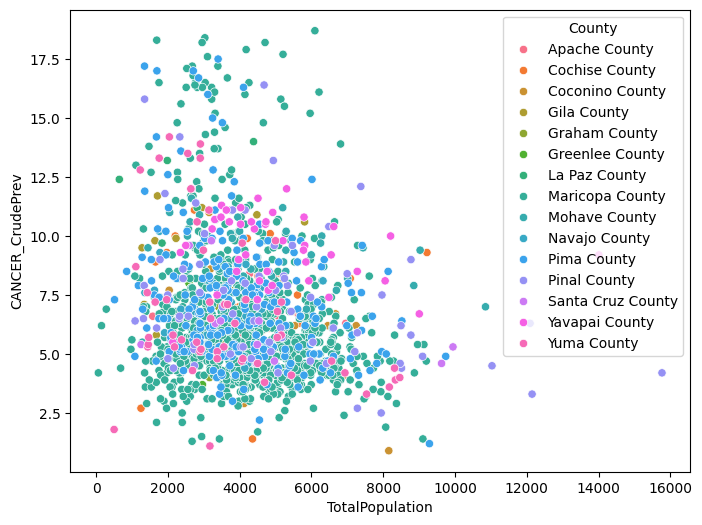

In [ ]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer
plt.figure(figsize=(8,6))
sns.scatterplot(data=Geo_Merge, x="TotalPopulation",y="CANCER_CrudePrev", hue="County")
plt.show()
